In [17]:
import pandas as pd
import numpy as np

In [3]:
data =  pd.read_csv("C:/Users/Rohan/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv",delimiter = ',')

In [4]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
valid_data = data[['slice_file_name','fsID', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]

In [6]:
len(valid_data)

7468

In [7]:
import librosa

In [8]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [9]:
valid_data.head()

,slice_file_name,fsID,fold,classID,class,path
1,100263-2-0-117.wav,100263,5,2,children_playing,fold5/100263-2-0-117.wav
2,100263-2-0-121.wav,100263,5,2,children_playing,fold5/100263-2-0-121.wav
3,100263-2-0-126.wav,100263,5,2,children_playing,fold5/100263-2-0-126.wav
4,100263-2-0-137.wav,100263,5,2,children_playing,fold5/100263-2-0-137.wav
5,100263-2-0-143.wav,100263,5,2,children_playing,fold5/100263-2-0-143.wav


In [10]:
y1, sr1 = librosa.load('C:/Users/Rohan/Downloads/UrbanSound8K/audio/fold5/100263-2-0-117.wav',duration = 2.97)

In [11]:
ps1 = ps = librosa.feature.melspectrogram(y=y1, sr=sr1)

In [12]:
import librosa.display

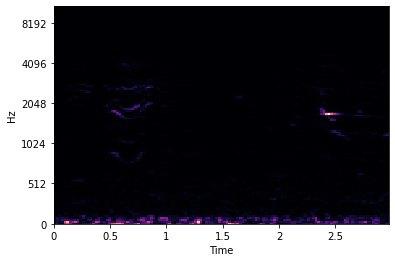

In [13]:
librosa.display.specshow(ps1, y_axis = 'mel', x_axis = 'time')

In [14]:
ps1.shape

(128, 128)

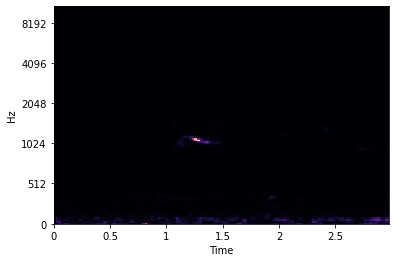

In [15]:
y2 ,sr2 = librosa.load('C:/Users/Rohan/Downloads/UrbanSound8K/audio/fold5/100263-2-0-121.wav', duration = 2.97)
ps2 = librosa.feature.melspectrogram(y=y2,sr=sr2)
librosa.display.specshow(ps2,x_axis = 'time',y_axis = 'mel')

In [16]:
ps2.shape

(128, 128)

In [19]:
d = valid_data.to_numpy()

In [21]:
d[0]

array(['100263-2-0-117.wav', 100263, 5, 2, 'children_playing',
       'fold5/100263-2-0-117.wav'], dtype=object)

In [30]:
D = []

for row in d:
    y, sr = librosa.load('C:/Users/Rohan/Downloads/UrbanSound8K/audio/' + row[5], duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row[3]) )

In [31]:
D

[(array([[1.9723278e-02, 4.1040562e-02, 1.8539123e-02, ..., 8.5462835e-03,
          5.3339968e-03, 3.8408160e-02],
         [2.2824362e-02, 3.6766432e-02, 2.0244755e-02, ..., 2.0034175e-02,
          1.5074839e-02, 1.0440601e-02],
         [1.8157125e-02, 3.0914154e-02, 2.6804930e-02, ..., 1.6050415e-02,
          1.7375546e-02, 1.1339896e-02],
         ...,
         [2.8042020e-06, 2.5728361e-06, 3.4476034e-06, ..., 6.0977309e-06,
          1.1406618e-05, 1.2841095e-05],
         [1.4985648e-06, 1.2168863e-06, 2.0153952e-06, ..., 7.5262244e-07,
          1.8069226e-06, 3.9235983e-06],
         [9.5098898e-07, 2.9593167e-07, 7.4605310e-08, ..., 4.4321936e-08,
          4.9451511e-08, 2.0704728e-07]], dtype=float32),
  2),
 (array([[2.7893863e-03, 1.5973326e-02, 5.6601334e-02, ..., 2.7980326e-02,
          1.7688423e-02, 6.1508860e-03],
         [1.2724350e-02, 5.9591249e-02, 8.4515721e-02, ..., 3.1760365e-02,
          3.0016309e-02, 5.5024944e-02],
         [3.6241442e-02, 5.9991710e

In [33]:
len(D)

7467

In [34]:
x = []
y = []
for tup in D:
    x.append(tup[0])
    y.append(tup[1])

In [35]:
x[0]

array([[1.9723278e-02, 4.1040562e-02, 1.8539123e-02, ..., 8.5462835e-03,
        5.3339968e-03, 3.8408160e-02],
       [2.2824362e-02, 3.6766432e-02, 2.0244755e-02, ..., 2.0034175e-02,
        1.5074839e-02, 1.0440601e-02],
       [1.8157125e-02, 3.0914154e-02, 2.6804930e-02, ..., 1.6050415e-02,
        1.7375546e-02, 1.1339896e-02],
       ...,
       [2.8042020e-06, 2.5728361e-06, 3.4476034e-06, ..., 6.0977309e-06,
        1.1406618e-05, 1.2841095e-05],
       [1.4985648e-06, 1.2168863e-06, 2.0153952e-06, ..., 7.5262244e-07,
        1.8069226e-06, 3.9235983e-06],
       [9.5098898e-07, 2.9593167e-07, 7.4605310e-08, ..., 4.4321936e-08,
        4.9451511e-08, 2.0704728e-07]], dtype=float32)

In [36]:
y[0]

2

In [38]:
from tensorflow import keras

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xt = np.array([temp.reshape((128,128,1)) for temp in x])
yt = np.array(keras.utils.to_categorical(y,10))

x_train,x_test,y_train,y_test = train_test_split(xt,yt,random_state = 0)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dropout, Dense

In [43]:
cnn = Sequential()
    
cnn.add(Conv2D(32,kernel_size = (5,5), padding = 'same',activation = 'relu', input_shape = (128,128,1),strides = (1,1)))
cnn.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
cnn.add(Dropout(0.2))
    
cnn.add(Conv2D(32,kernel_size = (5,5), padding = 'same',activation = 'relu',strides = (1,1)))
cnn.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
cnn.add(Dropout(0.2))
    
cnn.add(Flatten())
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dropout(0.2))
    
cnn.add(Dense(10,activation = 'softmax'))
    
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
cnn.fit(x_train, y_train, epochs = 40, batch_size = 200)
    
score = cnn.evaluate(x_test, y_test)
    
print(score[1])

Epoch 1/40
28/28 [==============================] - 134s 5s/step - loss: 5.0489 - accuracy: 0.1514
Epoch 2/40
28/28 [==============================] - 128s 5s/step - loss: 2.2368 - accuracy: 0.1859
Epoch 3/40
28/28 [==============================] - 129s 5s/step - loss: 2.0972 - accuracy: 0.2601
Epoch 4/40
28/28 [==============================] - 128s 5s/step - loss: 1.8443 - accuracy: 0.3298
Epoch 5/40
28/28 [==============================] - 129s 5s/step - loss: 1.6167 - accuracy: 0.4140
Epoch 6/40
28/28 [==============================] - 128s 5s/step - loss: 1.4759 - accuracy: 0.4600
Epoch 7/40
28/28 [==============================] - 128s 5s/step - loss: 1.3641 - accuracy: 0.5065
Epoch 8/40
28/28 [==============================] - 184s 7s/step - loss: 1.2129 - accuracy: 0.5553
Epoch 9/40
28/28 [==============================] - 128s 5s/step - loss: 1.2510 - accuracy: 0.5545
Epoch 10/40
28/28 [==============================] - 636s 23s/step - loss: 1.1657 - accuracy: 0.5844
Epoch 11